# Importing Essential Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

# Data inspection

In [4]:
df = pd.read_csv("Meteorite Landing - Meteorite-Landings.csv")

In [5]:
df.head()

,Name,ID,NameType,Classification,Mass,Fall,Year,Coordinates
0,Aachen,1,Valid,L5,"Quantity[21, ""Grams""]",Fell,"DateObject[{1880}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{50.775, 6.08333}]"
1,Aarhus,2,Valid,H6,"Quantity[720, ""Grams""]",Fell,"DateObject[{1951}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{56.18333, 10.23333}]"
2,Abee,6,Valid,EH4,"Quantity[107000, ""Grams""]",Fell,"DateObject[{1952}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{54.21667, -113.}]"
3,Acapulco,10,Valid,Acapulcoite,"Quantity[1914, ""Grams""]",Fell,"DateObject[{1976}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{16.88333, -99.9}]"
4,Achiras,370,Valid,L6,"Quantity[780, ""Grams""]",Fell,"DateObject[{1902}, ""Year"", ""Gregorian"", -5.]","GeoPosition[{-33.16667, -64.95}]"


In [6]:
df["MassWei"] = df['Mass'].str.extract(r'\[(\d+),')
# df["MassSym"] = df["Mass"].str.extract(r'\[\d+, "(\w+)"')

df["MassWei"] =pd.to_numeric(df["MassWei"])
df = df.drop(columns="Mass")

The Mass is given in Quantity[21, "Grams"] format
> Therefore extracting the 21 from the data to create a Seperate column 'MassWei'

In [7]:
df["YrNo"] = df['Year'].str.extract(r'\[{(\d+)},')
df["YrNo"] =pd.to_numeric(df["YrNo"])
df = df.drop(columns="Year")


The Year is given in DateObject [{1880}, "Year", "Gregorian", -5.] format
> Therefore extracting the 1880 from the data to create a Seperate column 'YrNo'

In [8]:
LatLong = df["Coordinates"].str.extract(r'GeoPosition\[\{(-?\d+\.?\d*),\s*(-?\d+\.?\d*)\}\]')
df["lat"],df["long"] = LatLong[0],LatLong[1]
df["lat"],df["long"] = (pd.to_numeric(df["lat"]),pd.to_numeric(df["long"]))

df= df.drop(columns="Coordinates")

The Coordinates are given in  GeoPosition[{50.775, 6.08333}] format
> Therefore extracting the 50.775(latitude) and  6.08333(longitude) from the data to create a Seperate column 'lat' and 'long'

In [9]:
df.columns

Index(['Name', 'ID', 'NameType', 'Classification', 'Fall', 'MassWei', 'YrNo',
       'lat', 'long'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            45716 non-null  object 
 1   ID              45716 non-null  int64  
 2   NameType        45716 non-null  object 
 3   Classification  45716 non-null  object 
 4   Fall            45716 non-null  object 
 5   MassWei         13059 non-null  float64
 6   YrNo            45424 non-null  float64
 7   lat             32187 non-null  float64
 8   long            32187 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.1+ MB


In [11]:
df.describe(include="all")

,Name,ID,NameType,Classification,Fall,MassWei,YrNo,lat,long
count,45716,45716.000000,45716,45716,45716,1.305900e+04,45424.000000,32187.000000,32187.000000
unique,45716,NaN,2,466,2,NaN,NaN,NaN,NaN
top,Aachen,NaN,Valid,L6,Found,NaN,NaN,NaN,NaN
freq,1,NaN,45641,8285,44609,NaN,NaN,NaN,NaN
mean,NaN,26889.735104,NaN,NaN,NaN,4.605459e+04,1991.826413,-46.675559,72.854090
std,NaN,16860.683030,NaN,NaN,NaN,1.073603e+06,25.047805,47.049897,83.055587
min,NaN,1.000000,NaN,NaN,NaN,0.000000e+00,860.000000,-87.366670,-165.433330
25%,NaN,12688.750000,NaN,NaN,NaN,9.300000e+01,1987.000000,-79.683330,26.000000
50%,NaN,24261.500000,NaN,NaN,NaN,3.530000e+02,1998.000000,-72.000000,56.646250
75%,NaN,40656.750000,NaN,NaN,NaN,1.762000e+03,2003.000000,18.536165,159.386110


In [12]:
df.isnull().sum()

Name                  0
ID                    0
NameType              0
Classification        0
Fall                  0
MassWei           32657
YrNo                292
lat               13529
long              13529
dtype: int64

In [13]:
df.head(15)

,Name,ID,NameType,Classification,Fall,MassWei,YrNo,lat,long
0,Aachen,1,Valid,L5,Fell,21.0,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,Fell,720.0,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,Fell,107000.0,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,Fell,1914.0,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,Fell,780.0,1902.0,-33.16667,-64.95000
5,Adhi Kot,379,Valid,EH4,Fell,4239.0,1919.0,32.10000,71.80000
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,Fell,910.0,1949.0,44.83333,95.16667
7,Agen,392,Valid,H5,Fell,30000.0,1814.0,44.21667,0.61667
8,Aguada,398,Valid,L6,Fell,1620.0,1930.0,-31.60000,-65.23333
9,Aguila Blanca,417,Valid,L,Fell,1440.0,1920.0,-30.86667,-64.55000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            45716 non-null  object 
 1   ID              45716 non-null  int64  
 2   NameType        45716 non-null  object 
 3   Classification  45716 non-null  object 
 4   Fall            45716 non-null  object 
 5   MassWei         13059 non-null  float64
 6   YrNo            45424 non-null  float64
 7   lat             32187 non-null  float64
 8   long            32187 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.1+ MB


---

# Data Handling

In [15]:
mod_df = df

In [16]:
mod_df = mod_df.drop_duplicates()
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            45716 non-null  object 
 1   ID              45716 non-null  int64  
 2   NameType        45716 non-null  object 
 3   Classification  45716 non-null  object 
 4   Fall            45716 non-null  object 
 5   MassWei         13059 non-null  float64
 6   YrNo            45424 non-null  float64
 7   lat             32187 non-null  float64
 8   long            32187 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.1+ MB


In [17]:
mod_df.isnull().sum()

Name                  0
ID                    0
NameType              0
Classification        0
Fall                  0
MassWei           32657
YrNo                292
lat               13529
long              13529
dtype: int64

In [20]:
mod_df = mod_df.dropna(subset=["YrNo", "lat" , "long"])
mod_df["YrNo"] = mod_df["YrNo"].astype(int)
mod_df['Decade'] = (mod_df['YrNo'] // 10) * 10

mod_df = mod_df[(mod_df['lat'] != 0) & (mod_df['long'] != 0)]

Dropping the NaN values in '**YrNo**','**lat**','**long**' because:
> No. of missing values in YrNo is very small (0.638726%)\
> Adding artificial values like mean , median or mode can severly skew the data in case of lat and long as the no. of Null values is large (29.59357%)

In [21]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31813 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            31813 non-null  object 
 1   ID              31813 non-null  int64  
 2   NameType        31813 non-null  object 
 3   Classification  31813 non-null  object 
 4   Fall            31813 non-null  object 
 5   MassWei         8591 non-null   float64
 6   YrNo            31813 non-null  int64  
 7   lat             31813 non-null  float64
 8   long            31813 non-null  float64
 9   Decade          31813 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 2.7+ MB


In [23]:
mod_df["MassWei_Perkg"] = mod_df["MassWei"] / 1000

> Creating a Mass Per Kg column for further insights

# Analysis


In [24]:
heaviest_10 = mod_df.sort_values(by='MassWei', ascending=False).head(10)
print("Top 10 Heaviest Meteorites (All measurements in grams):")
print(heaviest_10[['Name', 'MassWei','MassWei_Perkg']])

Top 10 Heaviest Meteorites (All measurements in grams):
                        Name     MassWei  MassWei_Perkg
16392                   Hope  60000000.0        60000.0
5373            Catalina 011  58200000.0        58200.0
5365            Catalina 003  50000000.0        50000.0
5370            Catalina 008  30000000.0        30000.0
3455              Asuka 8602  28000000.0        28000.0
12613      Glorieta Mountain  26000000.0        26000.0
5468        Colorado Springs  24300000.0        24300.0
26297        Mundrabilla 005  24000000.0        24000.0
920                    Sinai  23000000.0        23000.0
5016   Bates Nunataks A78005  22000000.0        22000.0


In [25]:
fall_counts = mod_df['Fall'].value_counts()
print("Fell vs. Found Counts:")
print(fall_counts)

Fell vs. Found Counts:
Fall
Found    30718
Fell      1095
Name: count, dtype: int64


In [26]:
Discovery_Per_Decade = mod_df.groupby('Decade').size()
print("\nDiscoveries by Decade:")
print(Discovery_Per_Decade.tail())


Discoveries by Decade:
Decade
1970    4739
1980    6806
1990    9094
2000    8090
2010     827
dtype: int64


In [27]:
MassMod_df = mod_df[mod_df['MassWei'] > 0]

MassWei_PerKg = MassMod_df['MassWei'].to_numpy() / 1000

print(f"\nMean mass: {np.mean(MassWei_PerKg):.2f} kg")
print(f"Median mass: {np.median(MassWei_PerKg):.2f} kg")
print(f"Standard Deviation of mass: {np.std(MassWei_PerKg):.2f} kg")
print(f"Total mass: {np.sum(MassWei_PerKg):.2f} kg")
print(f"Max mass: {np.max(MassWei_PerKg):.2f} kg")



Mean mass: 68.73 kg
Median mass: 0.46 kg
Standard Deviation of mass: 1324.20 kg
Total mass: 589198.10 kg
Max mass: 60000.00 kg


In [28]:
Top10_Class= MassMod_df["Classification"].value_counts().nlargest(10).index.tolist()
Top10_Class = MassMod_df[MassMod_df['Classification'].isin(Top10_Class)]

Avg_Top10_Class = Top10_Class.groupby('Classification')['MassWei'].mean().sort_values(ascending=False)
Avg_Top10_Class

Classification
Iron, IIIAB    597724.588745
L5              12172.051667
H5               9698.411313
L4               6912.822511
L6               6151.021778
H4               5539.623568
LL6              4680.209205
H6               4155.378806
LL5              3890.165179
H5/6             1059.663717
Name: MassWei, dtype: float64

---

# Graph Plotting

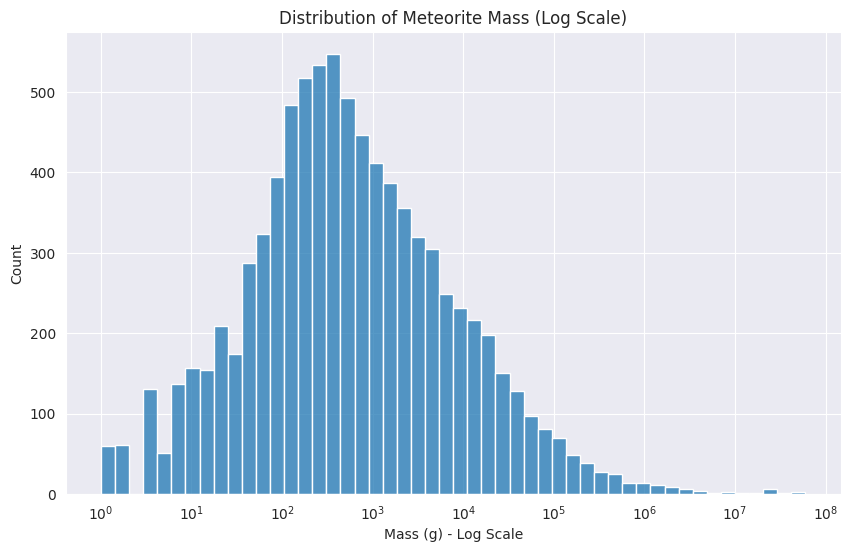

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=MassMod_df, x='MassWei', bins=50, log_scale=True)
plt.title('Distribution of Meteorite Mass (Log Scale)')
plt.xlabel('Mass (g) - Log Scale')
plt.ylabel('Count')
plt.show()

- Small Meteorites are Common, Large Ones are Rare: The vast majority of meteorites that strike Earth and are recovered are relatively small. Meteorites weighing many kilograms are exceptionally rare.

- Extreme Range: The use of a log scale is necessary to even visualize the data, highlighting the enormous range between the smallest and largest recorded masses, which spans many orders of magnitude.

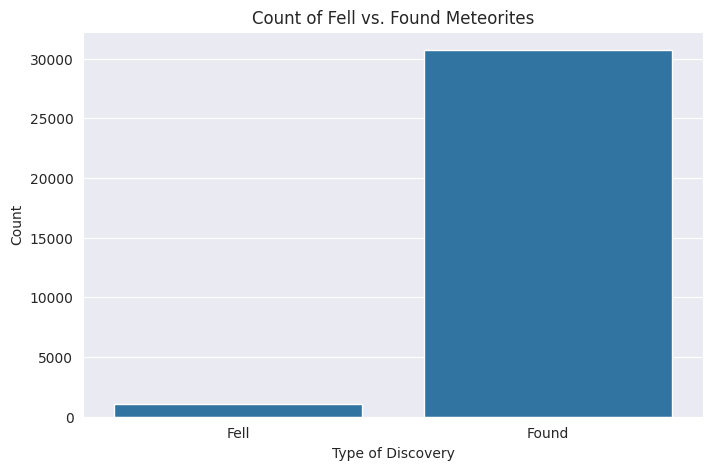

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(data=mod_df, x='Fall')
plt.title('Count of Fell vs. Found Meteorites')
plt.xlabel('Type of Discovery')
plt.ylabel('Count')
plt.show()

- Most Discoveries are "Found": The overwhelming majority of meteorites in scientific collections were discovered on the ground long after they landed.

- Observed Falls are Infrequent: It is a rare event for a meteorite to be seen falling ("Fell") and then successfully located and recovered. This indicates that most finds are the result of dedicated searches or accidental discoveries, not tracking fireballs in the sky.

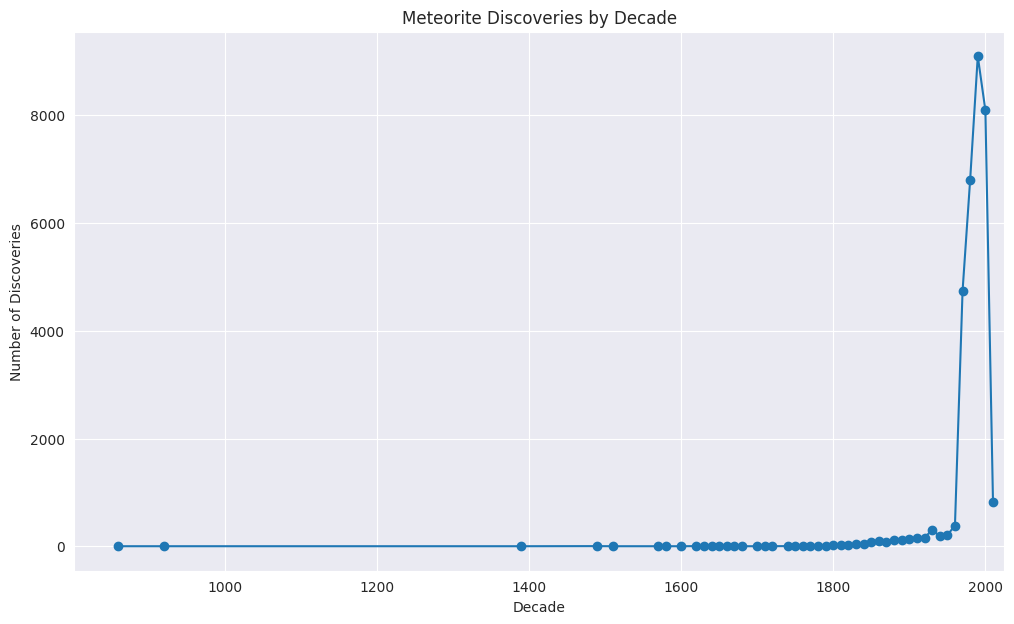

In [31]:
plt.figure(figsize=(12, 7))
Discovery_Per_Decade.plot(kind='line', marker='o')
plt.title('Meteorite Discoveries by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Discoveries')
plt.xlim(None, 2025)
plt.grid(True)
plt.show()

- An Explosion in Discoveries: There has been an exponential increase in meteorite discoveries in modern times.

- Impact of Systematic Searches: This trend is heavily driven by the start of systematic meteorite hunting programs, particularly in Antarctica and hot deserts (like the Sahara). In these environments, the dark meteorites are easy to spot against the ice or sand and are well-preserved.

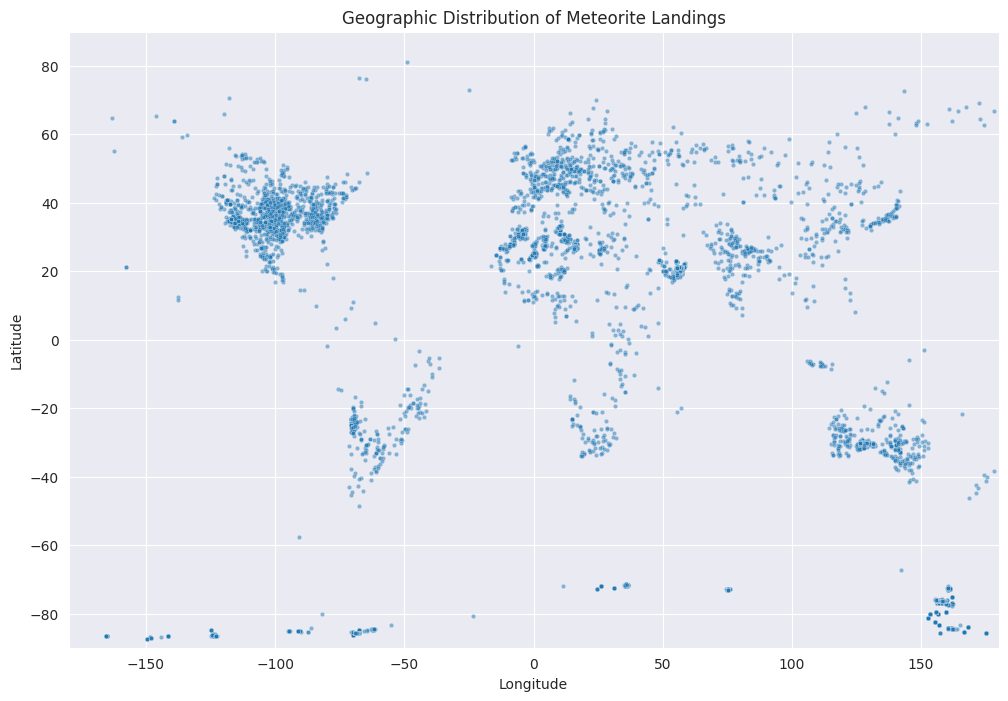

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=mod_df, x='long', y='lat', alpha=0.5, s=10)
plt.title('Geographic Distribution of Meteorite Landings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.grid(True)
plt.show()

- Discovery is Biased by Geography: Meteorites do not fall more in certain places, but they are much easier to find in specific locations.

- "Preservation Traps": You would see major clusters in Antarctica and Northwest Africa (the Sahara Desert). These are ideal hunting grounds because the dry, stable environment preserves the meteorites, and they stand out visually against the uniform background of ice or sand.

- Population Bias: You would also see smaller clusters in densely populated regions like Europe and the United States, where there are simply more people to accidentally stumble upon them.